In [ ]:
import re

def convert_markdown_to_html(markdown_string):
    # Convert headers (e.g., # Heading) to HTML headers
    markdown_string = re.sub(r'^(#{1,6}) (.+)$', lambda match: f'<h{len(match.group(1))}>{match.group(2)}</h{len(match.group(1))}>', markdown_string, flags=re.MULTILINE)

    # Convert bold (e.g., **bold**) to HTML <strong>
    markdown_string = re.sub(r'\*\*(.+?)\*\*', r'<strong>\1</strong>', markdown_string)

    # Convert italic (e.g., *italic*) to HTML <em>
    markdown_string = re.sub(r'\*(.+?)\*', r'<em>\1</em>', markdown_string)

    # Convert unordered lists (e.g., - Item) to HTML <ul> and <li>
    markdown_string = re.sub(r'(?<=\n)- (.+)(?=\n|$)', r'<ul>\n<li>\1</li>\n</ul>', markdown_string)

    # Convert links (e.g., [text](url)) to HTML <a>
    markdown_string = re.sub(r'\[(.+?)\]\((.+?)\)', r'<a href="\2">\1</a>', markdown_string)

    return markdown_string

# Example usage:
markdown_string = """
# This is a Heading 1

## This is a Heading 2

This is some **bold** text and *italic* text.

- List item 1
- List item 2
- List item 3

[Visit OpenAI](https://www.openai.com/)
"""

html_output = convert_markdown_to_html(markdown_string)
print(html_output)


: 

# Exploring AlphaVantage API and Python Libraries!


In the Lab:
- Experiment with the AlphaVantage API calls
- Collect daily data on different stocks, clean with Pandas, and save as csv files
- Build models with matplotlib to show changes over time/comparisons

# Set up AlphaVantage:

In [1]:
#The first step is to install the alpha_vantage library
!pip install alpha_vantage

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/369.0 kB ? eta -:--:--
   --------------------------------------- 369.0/369.0 kB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.5 kB ? eta -:--:--
   ---------------------------------------- 50.5/50.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/76.4 kB ? eta -:--:--
   ---------------------------------------- 76.4/76.4 kB 4.1 MB/s eta 0:00:00


In [2]:
#import requests and json (which you will use  to access the API/navigate)
import requests
import json

Create a free account with AlphaVantage at https://www.alphavantage.co to get an "API Key"
This key will grant you access to more basic uses of the API -- perfect for our uses

In [3]:
#Here, paste in  your own free API key as a string
api_key = 'PN70QLVOBRL0URCD' #replace with student's key, Ben's key inputted right now
base_url = 'https://www.alphavantage.co/query?' #the base of the search url!

# get_target_price()

Start with a get_target_price(ticker) function! Given an input (a ticker symbol), return the Analyst Target Price for a company!

Run get_target_price() for 'AMZN' -- currently the function only returns __ (maybe the entire overview) but try to just return the Analyst Target Price!

In [4]:
#For student version, would leave just as return data
def get_target_price(ticker):
  """ This function takes in
           ticker: the ticker for whatever company you wish to investigate
      And returns Analyst Target Price"""
  params = {'function':'OVERVIEW', 'symbol':ticker,'apikey': api_key}
  result = requests.get(base_url, params=params)
  print(f"result.status_code is {result.status_code}")
  if result.status_code == 200:
    data = result.json()
    return data
  else:
    print("returning {}")
    return {}

if True:
    data = get_target_price("AMZN")
    # now, we can use it!
    print(f"{len(data) = }")

result.status_code is 200
len(data) = 51


In [5]:
data

{'Symbol': 'AMZN',
 'AssetType': 'Common Stock',
 'Name': 'Amazon.com Inc',
 'Description': "Amazon.com, Inc. is an American multinational technology company which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook. The company has been referred to as one of the most influential economic and cultural forces in the world, as well as the world's most valuable brand.",
 'CIK': '1018724',
 'Exchange': 'NASDAQ',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'TRADE & SERVICES',
 'Industry': 'RETAIL-CATALOG & MAIL-ORDER HOUSES',
 'Address': '410 TERRY AVENUE NORTH, SEATTLE, WA, US',
 'FiscalYearEnd': 'December',
 'LatestQuarter': '2024-03-31',
 'MarketCapitalization': '1895562084000',
 'EBITDA': '96609001000',
 'PERatio': '50.46',
 'PEGRatio': '1.987',
 'BookValue': '20.83',
 'DividendPerShare': 'None',
 'DividendYield': 'N

In [7]:
# Test get_target_price()
# print("AMZN Analyst Target Price is:", get_target_price("AMZN"))

result.status_code is 200
AMZN Analyst Target Price is: {'Symbol': 'AMZN', 'AssetType': 'Common Stock', 'Name': 'Amazon.com Inc', 'Description': "Amazon.com, Inc. is an American multinational technology company which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook. The company has been referred to as one of the most influential economic and cultural forces in the world, as well as the world's most valuable brand.", 'CIK': '1018724', 'Exchange': 'NASDAQ', 'Currency': 'USD', 'Country': 'USA', 'Sector': 'TRADE & SERVICES', 'Industry': 'RETAIL-CATALOG & MAIL-ORDER HOUSES', 'Address': '410 TERRY AVENUE NORTH, SEATTLE, WA, US', 'FiscalYearEnd': 'December', 'LatestQuarter': '2024-03-31', 'MarketCapitalization': '1895562084000', 'EBITDA': '96609001000', 'PERatio': '50.46', 'PEGRatio': '1.987', 'BookValue': '20.83', 'DividendP

# latest_price()

 Write latest_price(ticker). The function should take in a ticker and return the current price of stock.


In parameters, use -- 'function': "GLOBAL_QUOTE"
Additional parameters should only be "symbol" and "apikey"


To find additional info + the necessary additional parameters, reference the API Documentation, "Quote Endpoint": **https://www.alphavantage.co/documentation/#latestprice**

In [ ]:
#Some examples of what students could do: (Have them start from scratch)
def latest_price(ticker):
  """ This function takes in
           ticker: the ticker for whatever company you wish to investigate
      And returns the current price of that company's stock"""
  params = {'function':'GLOBAL_QUOTE', 'symbol':ticker, 'apikey': api_key}
  result = requests.get(base_url, params=params)
  print(f"result.status_code is {result.status_code}")
  if result.status_code == 200:
    data = result.json()
    return data
  else:
    print("returning {}")
    return {}

if True:
    data = latest_price("AAPL")
    # now, we can use it!
    print(f"{len(data) = }")

result.status_code is 200
len(data) = 1


In [ ]:
data

{'Global Quote': {'01. symbol': 'AAPL',
  '02. open': '188.8200',
  '03. high': '190.5800',
  '04. low': '188.0404',
  '05. price': '189.9800',
  '06. volume': '36326975',
  '07. latest trading day': '2024-05-24',
  '08. previous close': '186.8800',
  '09. change': '3.1000',
  '10. change percent': '1.6588%'}}

In [ ]:
data['Global Quote']['05. price']

'189.9800'

In [ ]:
# Test get_est_earnings()
# print("Apple's latest price is:",latest_price("AAPL"))

result.status_code is 200
Apple's latest price is: {'Global Quote': {'01. symbol': 'AAPL', '02. open': '188.8200', '03. high': '190.5800', '04. low': '188.0404', '05. price': '189.9800', '06. volume': '36326975', '07. latest trading day': '2024-05-24', '08. previous close': '186.8800', '09. change': '3.1000', '10. change percent': '1.6588%'}}


# get_daily_data()

Next, look at a function to get historical data on a specific company's stock: get_daily_data()! Test out the function on "AAPL" (warning: you'll get a long return -- don't worry! This is data from 1991 to now -- it's bound to be long)

In [ ]:
def get_daily_data(ticker):
  """ This function takes in
           ticker: the ticker for whatever company you wish to investigate
      And returns all of the data for every day
    """
  params = {'function':'TIME_SERIES_DAILY_ADJUSTED', 'symbol':ticker, 'outputsize': 'full', 'datatype':'json', 'apikey': api_key}
  result = requests.get(base_url, params=params)
  print(f"result.status_code is {result.status_code}")
  if result.status_code == 200:
    data = result.json()
    return data['Time Series (Daily)']    #returns all of the data MINUS the unnecessary heading data
  else:
    print("returning {}")
    return {}

In [ ]:
aapl_daily = get_daily_data('AAPL')
aapl_daily

result.status_code is 200


{'2023-06-20': {'1. open': '184.69',
  '2. high': '186.1',
  '3. low': '184.445',
  '4. close': '185.01',
  '5. adjusted close': '185.01',
  '6. volume': '49748809',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-06-16': {'1. open': '186.73',
  '2. high': '186.99',
  '3. low': '184.27',
  '4. close': '184.92',
  '5. adjusted close': '184.92',
  '6. volume': '101256225',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-06-15': {'1. open': '183.96',
  '2. high': '186.52',
  '3. low': '183.78',
  '4. close': '186.01',
  '5. adjusted close': '186.01',
  '6. volume': '65433166',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-06-14': {'1. open': '183.37',
  '2. high': '184.39',
  '3. low': '182.02',
  '4. close': '183.95',
  '5. adjusted close': '183.95',
  '6. volume': '57462882',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-06-13': {'1. open': '182.8',
  '2. high': '184.15',
  '3

Now, lets make the data more presentable using pandas! Below is a function cleanData()

In [ ]:
#import the pandas library
import pandas as pd

In [ ]:
def cleanData(df):
  #create a new, clean dataframe using pandas; use transpose to make the dates separate rows, rather than columns
  cleanedDf = pd.DataFrame(df).transpose()

  #name the index of the dataFrame (which is the list of dates), 'date'
  cleanedDf = cleanedDf.rename_axis('date')

  #We need to make the column titles easier to call -- no numbers! Use string splicing and for loops
      #currently all column titles are '1. open' '2. high' etc. --> we just want 'open', 'high', etc.
  new_col = {}
  for i in cleanedDf.columns.values:
    new_col[i] = i[3:] #get rid of the numbers at the beginning
  cleanedDf = cleanedDf.rename(columns=new_col)

  #Finally, we need to make all of our numerical data numbers rather than strings! Change them all to floats
  for i in cleanedDf.columns.values:
    for k in range(len(cleanedDf[i])):
      cleanedDf[i][k] = float(cleanedDf[i][k])
  return cleanedDf #return your cleaned data

In [ ]:
#Clean your Apple data! - it can take a little while (there's a lot of data to loop through)
cleanedAaplDaily = cleanData(aapl_daily)
cleanedAaplDaily

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2023-06-20,184.69,186.1,184.445,185.01,185.01,49748809.0,0.0,1.0
2023-06-16,186.73,186.99,184.27,184.92,184.92,101256225.0,0.0,1.0
2023-06-15,183.96,186.52,183.78,186.01,186.01,65433166.0,0.0,1.0
2023-06-14,183.37,184.39,182.02,183.95,183.95,57462882.0,0.0,1.0
2023-06-13,182.8,184.15,182.44,183.31,183.31,54929129.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,84.62,88.37,84.0,88.31,0.67008,3721500.0,0.0,1.0
1999-11-04,82.06,85.37,80.62,83.62,0.634493,3384700.0,0.0,1.0
1999-11-03,81.62,83.25,81.0,81.5,0.618407,2932700.0,0.0,1.0


# Save other data:

Write functions to get the monthly fed. interest rates, unemployment rates, and other data (that you'd like to later consider in predicting stock prices), and add them to the same dataframe

Below are get_interest_rates() and get_ur_data() functions, which return the historical fed. funds rates (interest rate) and unemployment rates

In [ ]:
def get_interest_rates():
  """ This function returns the historical fed funds rate (interest rate)
    """
  params = {'function':'FEDERAL_FUNDS_RATE', 'interval':'monthly','datatype':'json', 'apikey': api_key}
  result = requests.get(base_url, params=params)
  if result.status_code == 200:
    data = result.json()
    return data['data']    #returns all of the data MINUS the unnecessary heading data
  else:
    print("returning {}")
    return {}


ffrate_data = get_interest_rates()

In [ ]:
def get_ur_data():
  """ This function returns the  unemployment rate  data (historically, monthly)
    """
  params = {'function':'UNEMPLOYMENT', 'datatype':'json', 'apikey': api_key}
  result = requests.get(base_url, params=params)
  if result.status_code == 200:
    data = result.json()
    return data['data']    #returns all of the data MINUS the unnecessary heading data
  else:
    print("returning {}")
    return {}


ur_data = get_ur_data()

Write functions to get additional data:
look at the API documentation (https://www.alphavantage.co/documentation) for different possibilities and pick a couple to work with

**If you run all of these cells quickly, in a row, you may get an error- this is b/c the free AlphaVantage account has limited calls per min. If you get an error, wait and come back to it in a few minutes!**

In [ ]:
def get_durable_goods_data():
  """ This function returns the durable goods manufacturer orders in billions of dollars (historically, monthly)
    """
  params = {'function':'DURABLES', 'datatype':'json', 'apikey': api_key}
  result = requests.get(base_url, params=params)
  if result.status_code == 200:
    data = result.json()
    return data['data']    #returns all of the data MINUS the unnecessary heading data
  else:
    print("returning {}")
    return {}


durgoods_data = get_durable_goods_data()

In [ ]:
def get_al_data():
  """ This function returns the monthly global aluminum price (historically)
    """
  params = {'function':'ALUMINUM', 'interval': 'monthly','datatype':'json', 'apikey': api_key}
  result = requests.get(base_url, params=params)
  if result.status_code == 200:
    data = result.json()
    return data['data']  #returns all of the data MINUS the unnecessary heading data
  else:
    print("returning {}")
    return {}


al_data = get_al_data()

Remember that unemployment and interest rates (along with other data) are monthly, not daily --

Below is a function (monthly_to_daily) that takes in a list of monthly data and a daily-price df. It returns LoDaily, a list of the monthly data repeated for every index in our daily-price df. This way, every day is matched up with the *most recent* unemployment rate/interest rate/etc


In [ ]:
#the other data is monthly, but we're using daily historic data -- add the same interest rates, etc for the whole month (the most recent rates)

def monthly_to_daily(monthly_data, df):
  """given daily data and monthly_data, repeats the most recent monthly data for every piece of daily data;
        returns a list of the monthly (converted to daily) data"""
  LoDaily = []
  current_month_index = 0 #start with the most recent data, move to the next index when we've gone before this date

  for i in df.index:
    if i <= monthly_data[current_month_index]['date']: #if the daily date is before the monthly_data release date, move on to the previous month's data
      current_month_index += 1

    #now add the value according to that month_index to our LoDaily for the daily price:
    LoDaily.append(monthly_data[current_month_index]['value'])

  return LoDaily

Next, add the daily version of all of your different data (including ffrate_data, ur_data) to your daily Apple dataset

In [ ]:
#add your lists of data to new columns in the df_final
df_full_aapl = cleanedAaplDaily
df_full_aapl['intrst'] = monthly_to_daily(ffrate_data, cleanedAaplDaily)
df_full_aapl['unemplymt'] = monthly_to_daily(ur_data, cleanedAaplDaily)
df_full_aapl['al price'] = monthly_to_daily(al_data, cleanedAaplDaily)
df_full_aapl['dur goods'] = monthly_to_daily(durgoods_data,cleanedAaplDaily)
df_full_aapl

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt,al price,dur goods
date,,,,,,,,,,,,
2023-06-20,184.69,186.1,184.445,185.01,185.01,49748809.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-16,186.73,186.99,184.27,184.92,184.92,101256225.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-15,183.96,186.52,183.78,186.01,186.01,65433166.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-14,183.37,184.39,182.02,183.95,183.95,57462882.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-13,182.8,184.15,182.44,183.31,183.31,54929129.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,84.62,88.37,84.0,88.31,0.67008,3721500.0,0.0,1.0,5.42,4.1,1472.43181818182,183986
1999-11-04,82.06,85.37,80.62,83.62,0.634493,3384700.0,0.0,1.0,5.42,4.1,1472.43181818182,183986
1999-11-03,81.62,83.25,81.0,81.5,0.618407,2932700.0,0.0,1.0,5.42,4.1,1472.43181818182,183986


Now we need to save our data to a **csv file**

The data needs to be saved in Google Drive -- that way, in later projects, we can use our data

In your google drive, wherever you store your work for this course:
- create a folder for your csv files of data
- note the pathway for that file -- it should start with /content/drive/MyDrive/(any folder names)

In [ ]:
#let's save our monthly data as a csv file
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Data_csv/aapl_daily.csv' #here, put the path to your csv data folder
      #/content/drive/MyDrive/(your folder names)/(name of your csv file).csv

#now use this path to save the dataset as a csv file in your google drive:
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_full_aapl.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Modeling the Data!
Now we'll use matplotlib to graph our Apple data over time to see how it changes

In [ ]:
#First let's open up our csv file with our data and present it as a pandas dataframe:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/Data_csv/aapl_daily.csv" #copy this path from the previous cell, where you saved the file!
aapl_daily_final = pd.read_csv(path) #read the csv file
aapl_daily_final

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt,al price,dur goods
0,2023-06-20,184.69,186.10,184.445,185.01,185.010000,49748809.0,0.0,1.0,5.06,3.7,2274.012609,272541
1,2023-06-16,186.73,186.99,184.270,184.92,184.920000,101256225.0,0.0,1.0,5.06,3.7,2274.012609,272541
2,2023-06-15,183.96,186.52,183.780,186.01,186.010000,65433166.0,0.0,1.0,5.06,3.7,2274.012609,272541
3,2023-06-14,183.37,184.39,182.020,183.95,183.950000,57462882.0,0.0,1.0,5.06,3.7,2274.012609,272541
4,2023-06-13,182.80,184.15,182.440,183.31,183.310000,54929129.0,0.0,1.0,5.06,3.7,2274.012609,272541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,1999-11-05,84.62,88.37,84.000,88.31,0.670080,3721500.0,0.0,1.0,5.42,4.1,1472.431818,183986
5942,1999-11-04,82.06,85.37,80.620,83.62,0.634493,3384700.0,0.0,1.0,5.42,4.1,1472.431818,183986
5943,1999-11-03,81.62,83.25,81.000,81.50,0.618407,2932700.0,0.0,1.0,5.42,4.1,1472.431818,183986
5944,1999-11-02,78.00,81.69,77.310,80.25,0.608922,3564600.0,0.0,1.0,5.42,4.1,1472.431818,183986


In [ ]:
#import the necessary libraries for our modeling!
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

Right now, the below code plots out the highs and lows of Apple prices from our AAPL data. Mess around with different values and formats to get used to matplotlib:

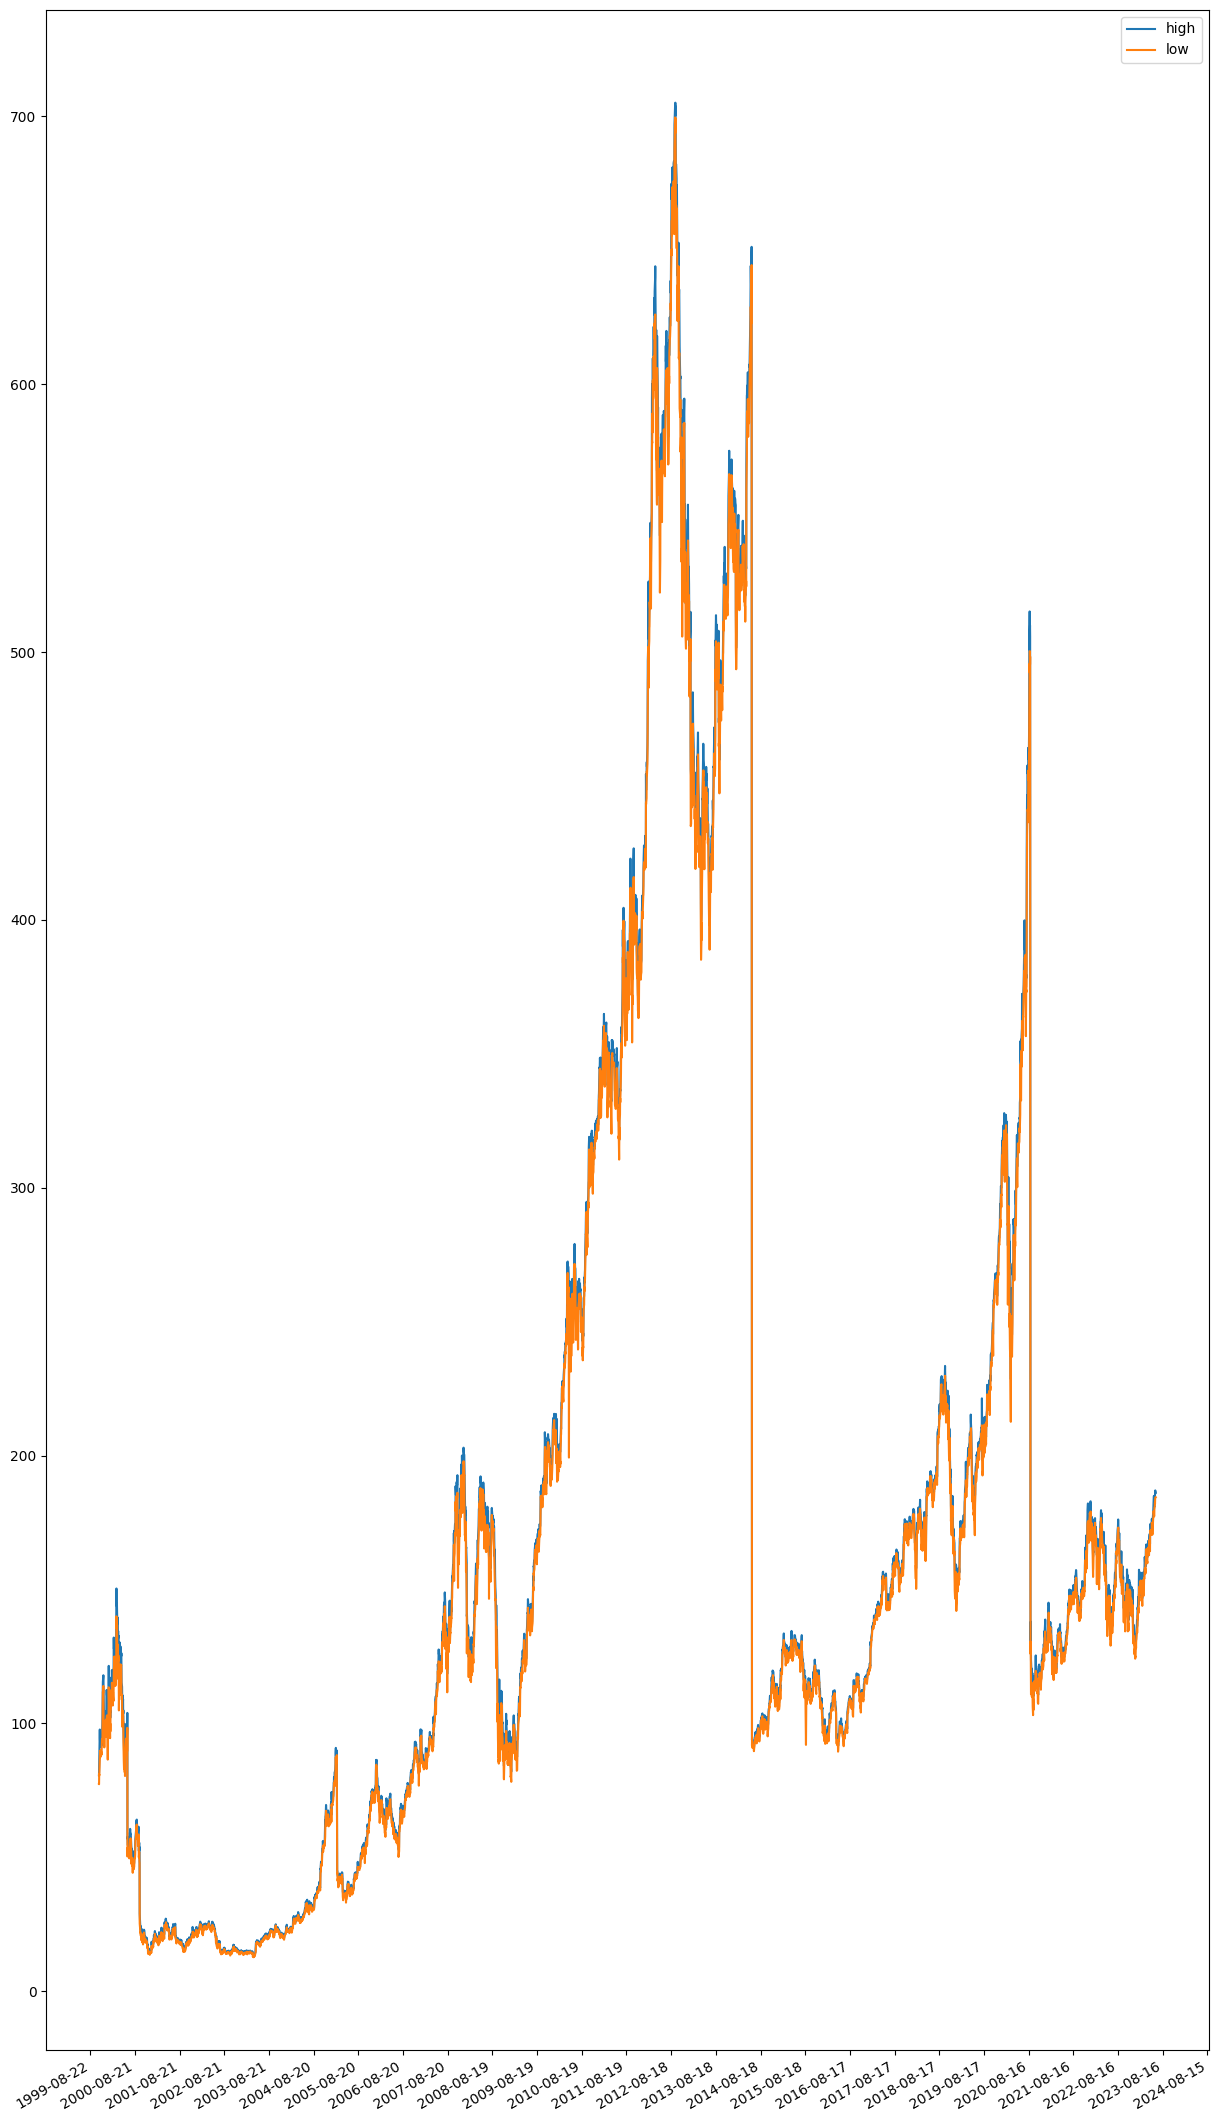

In [ ]:
#Plot out our apple data
plt.figure(figsize=(15,30))

#we need to set the x-axis to take in dates:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))  #the interval is the number of days between each labeled date on the x-axis

#now our x-dates -- the dates from the apple dataset:
                    #we need to convert these dates from strings to datetime datatype
x_dates=[dt.datetime.strptime(d,'%Y-%m-%d') for d in aapl_daily_final['date']]

#plot the high and low values:
plt.plot(x_dates, aapl_daily_final['high'], label='high')
plt.plot(x_dates, aapl_daily_final['low'], label='low')

plt.legend() #include a legend
plt.gcf().autofmt_xdate()
plt.show()

# Compare Apple to another company



Use get_daily_data() to retrieve data on MSFT (or another competitor you'd like to look at)

Then:
- clean your data with your cleanData function
- save the data as a csv file (for later projects!)
- And plot out the AAPL and MSFT data to compare them (use the modeling code above as a foundation -- choose one aspect from your data to compare)

In [ ]:
#get your MSFT data and clean it
msft_daily = get_daily_data("MSFT")
cleanedMSFTDaily = cleanData(msft_daily)

result.status_code is 200


In [ ]:
#Now add the additional data to this dataset as well: (this is for later projects)
#add your lists of data to new columns in the df_final

#this should be a familiar process from the Apple Daily Data
df_full_msft = cleanedMSFTDaily
df_full_msft['intrst'] = monthly_to_daily(ffrate_data, cleanedMSFTDaily)
df_full_msft['unemplymt'] = monthly_to_daily(ur_data, cleanedMSFTDaily)
df_full_msft['al price'] = monthly_to_daily(al_data, cleanedMSFTDaily)
df_full_msft['dur goods'] = monthly_to_daily(durgoods_data,cleanedMSFTDaily)
df_full_msft

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt,al price,dur goods
date,,,,,,,,,,,,
2023-06-20,339.27,342.07,335.86,338.05,338.05,26351913.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-16,351.32,351.47,341.95,342.33,342.33,46551985.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-15,337.48,349.84,337.2,348.1,348.1,38899075.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-14,334.34,339.04,332.81,337.34,337.34,26003791.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
2023-06-13,334.465,336.98,330.39,334.29,334.29,22951279.0,0.0,1.0,5.06,3.7,2274.01260869565,272541
...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,91.81,92.87,90.5,91.56,28.558568,35083700.0,0.0,1.0,5.42,4.1,1472.43181818182,183986
1999-11-04,92.31,92.75,90.31,91.75,28.617831,27119700.0,0.0,1.0,5.42,4.1,1472.43181818182,183986
1999-11-03,92.94,93.5,91.5,92.0,28.695809,22258500.0,0.0,1.0,5.42,4.1,1472.43181818182,183986


In [ ]:
#Now let's save our MSFT data to a csv file
from google.colab import drive
drive.mount('/content/drive')

#path should be the same (keep all your csv files in the same folder) but with a different csv file name
path = '/content/drive/MyDrive/Colab Notebooks/Data_csv/msft_daily.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_full_msft.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Now let's open up our MSFT data csv file and present it as a pandas df:

path = "/content/drive/MyDrive/Colab Notebooks/Data_csv/msft_daily.csv"
msft_daily_final = pd.read_csv(path)
msft_daily_final

,date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt,al price,dur goods
0,2023-06-20,339.270,342.07,335.86,338.05,338.050000,26351913.0,0.0,1.0,5.06,3.7,2274.012609,272541
1,2023-06-16,351.320,351.47,341.95,342.33,342.330000,46551985.0,0.0,1.0,5.06,3.7,2274.012609,272541
2,2023-06-15,337.480,349.84,337.20,348.10,348.100000,38899075.0,0.0,1.0,5.06,3.7,2274.012609,272541
3,2023-06-14,334.340,339.04,332.81,337.34,337.340000,26003791.0,0.0,1.0,5.06,3.7,2274.012609,272541
4,2023-06-13,334.465,336.98,330.39,334.29,334.290000,22951279.0,0.0,1.0,5.06,3.7,2274.012609,272541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,1999-11-05,91.810,92.87,90.50,91.56,28.558568,35083700.0,0.0,1.0,5.42,4.1,1472.431818,183986
5942,1999-11-04,92.310,92.75,90.31,91.75,28.617831,27119700.0,0.0,1.0,5.42,4.1,1472.431818,183986
5943,1999-11-03,92.940,93.50,91.50,92.00,28.695809,22258500.0,0.0,1.0,5.42,4.1,1472.431818,183986
5944,1999-11-02,92.750,94.50,91.94,92.56,28.870479,23174500.0,0.0,1.0,5.42,4.1,1472.431818,183986


In the below cell, plot MSFT and AAPL data to compare:

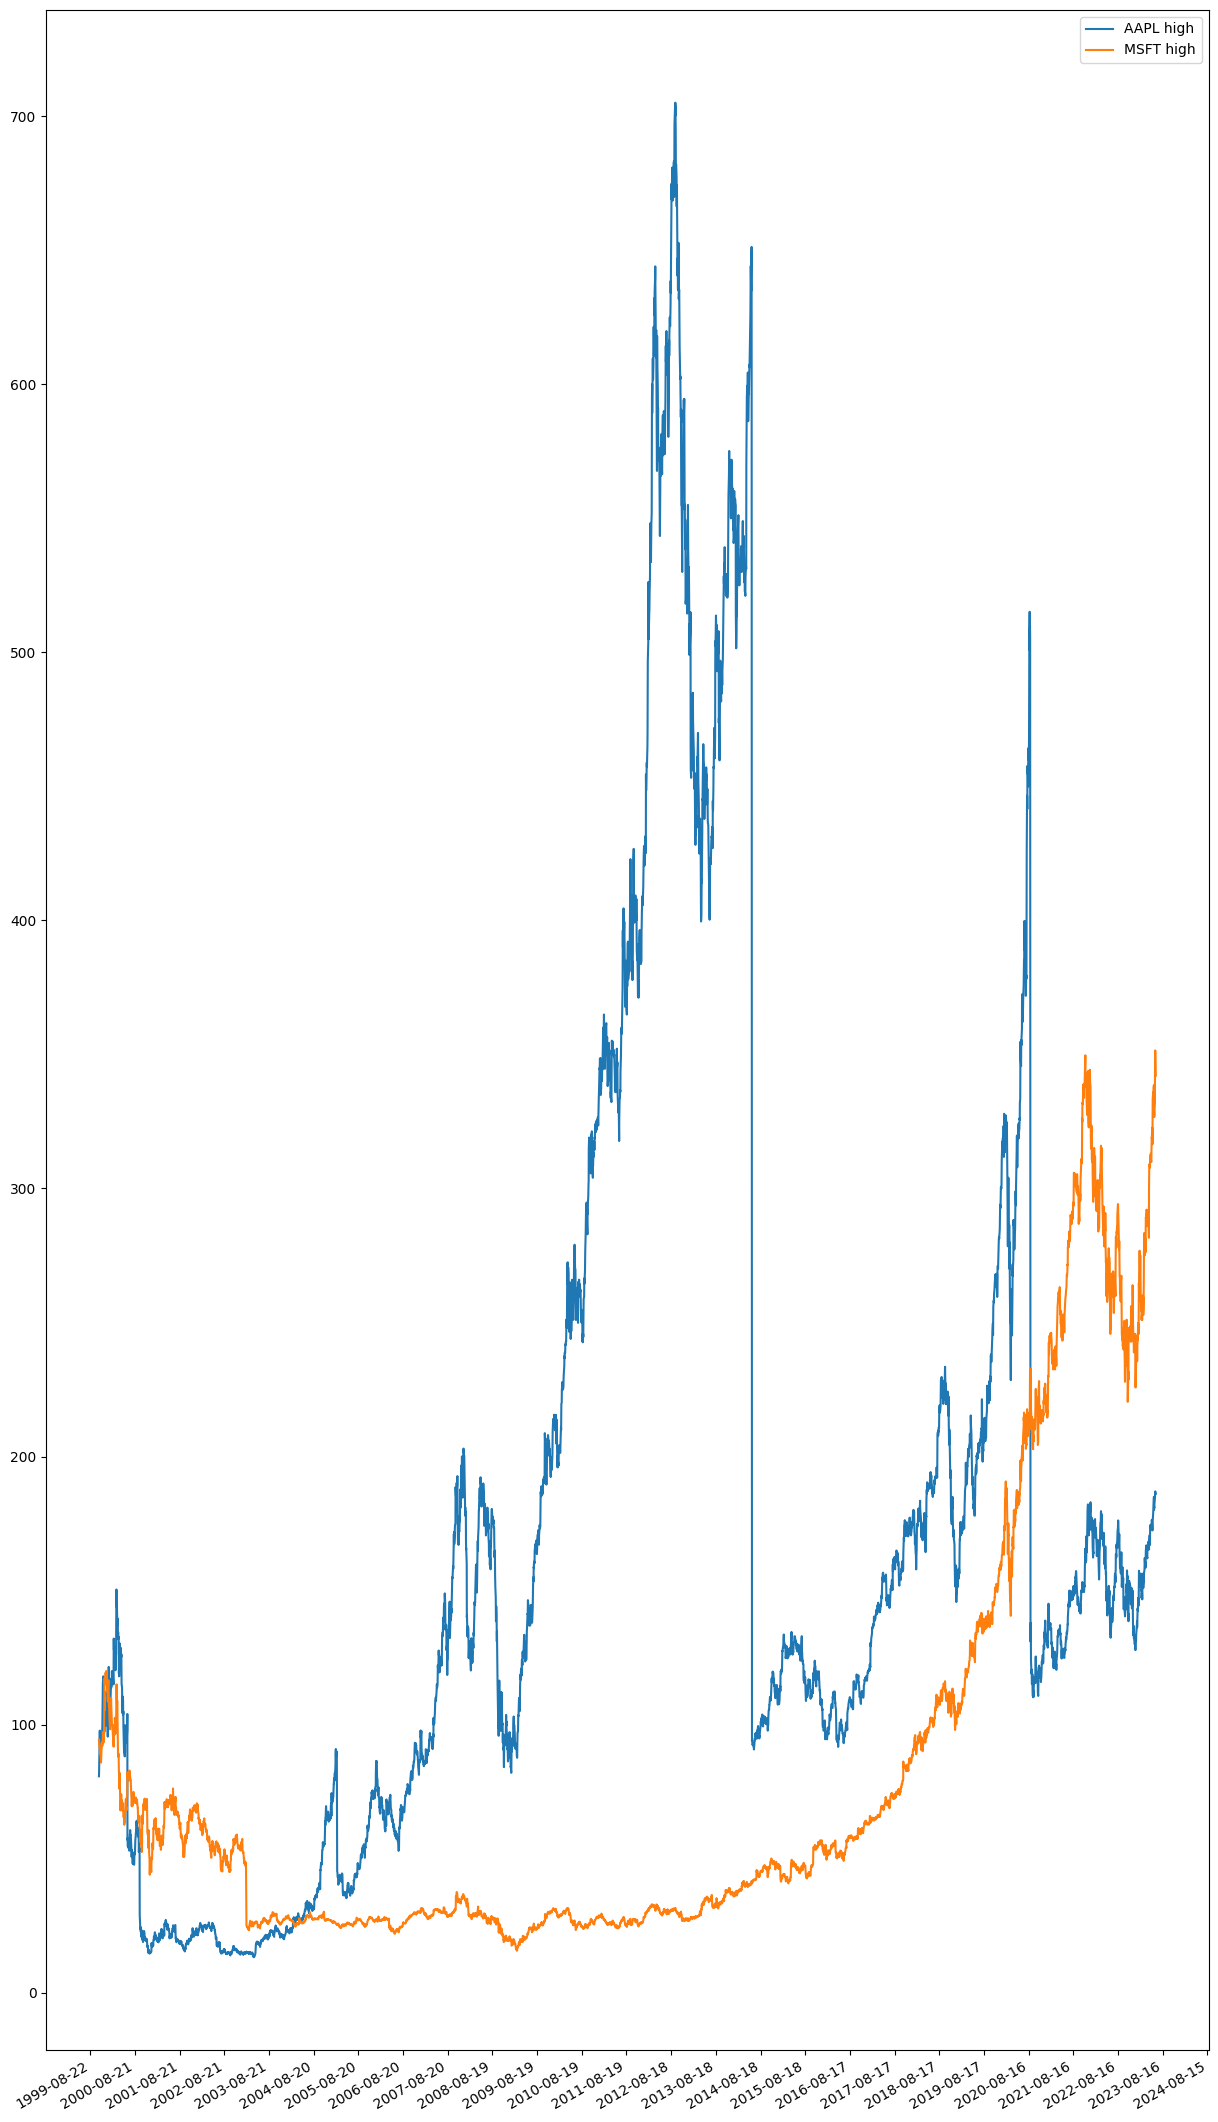

In [ ]:
plt.figure(figsize=(15,30))

#format the x-axis (as we did before)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
aapl_dates=[dt.datetime.strptime(d,'%Y-%m-%d') for d in aapl_daily_final['date']]
msft_dates=[dt.datetime.strptime(d,'%Y-%m-%d') for d in msft_daily_final['date']]

#plot AAPL and MSFT data:
plt.plot(aapl_dates, aapl_daily_final['high'], label='AAPL high')
plt.plot(msft_dates, msft_daily_final['high'], label='MSFT high')


plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# Collect Volatile Stocks' Data

You may want to look at how volatile stocks do in future projects -- pick a volatile stock to look at and save the data:

In [ ]:
#I used NVDA (Nvidia) which is very volatile right now... other stocks including oil or other high volatility stocks work too

#collect your data and clean
nvda_daily = get_daily_data("NVDA")
cleanedNVDADaily = cleanData(nvda_daily)

result.status_code is 200


In [ ]:
#Now add the additional data to this dataset as well: (this is for later projects)
#add your lists of data to new columns in the df_final

#this should be a familiar process from the Apple Daily Data
df_full_nvda = cleanedNVDADaily
df_full_nvda['intrst'] = monthly_to_daily(ffrate_data, cleanedNVDADaily)
df_full_nvda['unemplymt'] = monthly_to_daily(ur_data, cleanedNVDADaily)
    #I didn't include the other factors, b/c they don't have to do with BTC -- can get other data that may relate or just leave it...
df_full_nvda

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt
date,,,,,,,,,,
2023-06-20,429.9,439.9,426.74,438.08,438.08,45012489.0,0.0,1.0,5.06,3.7
2023-06-16,434.5,437.21,426.605,426.92,426.92,65570941.0,0.0,1.0,5.06,3.7
2023-06-15,426.02,432.89,421.47,426.53,426.53,56862204.0,0.0,1.0,5.06,3.7
2023-06-14,408.24,430.0,405.52,429.97,429.97,74046502.0,0.0,1.0,5.06,3.7
2023-06-13,401.86,411.01,397.4,410.22,410.22,61320816.0,0.0,1.0,5.06,3.7
...,...,...,...,...,...,...,...,...,...,...
1999-11-05,30.0,30.25,26.88,28.25,0.540064,1284100.0,0.0,1.0,5.42,4.1
1999-11-04,27.75,29.94,27.75,29.19,0.558034,2625700.0,0.0,1.0,5.42,4.1
1999-11-03,26.0,28.13,25.81,27.44,0.524579,4191000.0,0.0,1.0,5.42,4.1


In [ ]:
#Now let's save our data to a csv file
from google.colab import drive
drive.mount('/content/drive')

#path should be the same (keep all your csv files in the same folder) but with a different csv file name
path = '/content/drive/MyDrive/Colab Notebooks/Data_csv/nvda_daily.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_full_nvda.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
#Now let's open up our data csv file and present it as a pandas df:

path = "/content/drive/MyDrive/Colab Notebooks/Data_csv/nvda_daily.csv"
nvda_daily_final = pd.read_csv(path)
nvda_daily_final

,date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,intrst,unemplymt
0,2023-06-15,426.15,432.8900,421.50,426.53,426.530000,56671548.0,0.0,1.0,5.06,3.7
1,2023-06-14,408.24,430.0000,405.52,429.97,429.970000,74046502.0,0.0,1.0,5.06,3.7
2,2023-06-13,401.86,411.0100,397.40,410.22,410.220000,61320816.0,0.0,1.0,5.06,3.7
3,2023-06-12,392.00,395.2999,386.18,394.82,394.820000,38967335.0,0.0,1.0,5.06,3.7
4,2023-06-09,390.37,397.1100,385.67,387.70,387.700000,42771747.0,0.0,1.0,5.06,3.7
...,...,...,...,...,...,...,...,...,...,...,...
5939,1999-11-05,30.00,30.2500,26.88,28.25,0.540064,1284100.0,0.0,1.0,5.42,4.1
5940,1999-11-04,27.75,29.9400,27.75,29.19,0.558034,2625700.0,0.0,1.0,5.42,4.1
5941,1999-11-03,26.00,28.1300,25.81,27.44,0.524579,4191000.0,0.0,1.0,5.42,4.1
5942,1999-11-02,23.94,25.1300,23.75,25.00,0.477933,1744800.0,0.0,1.0,5.42,4.1


In the cell below, plot your volatile stock data:

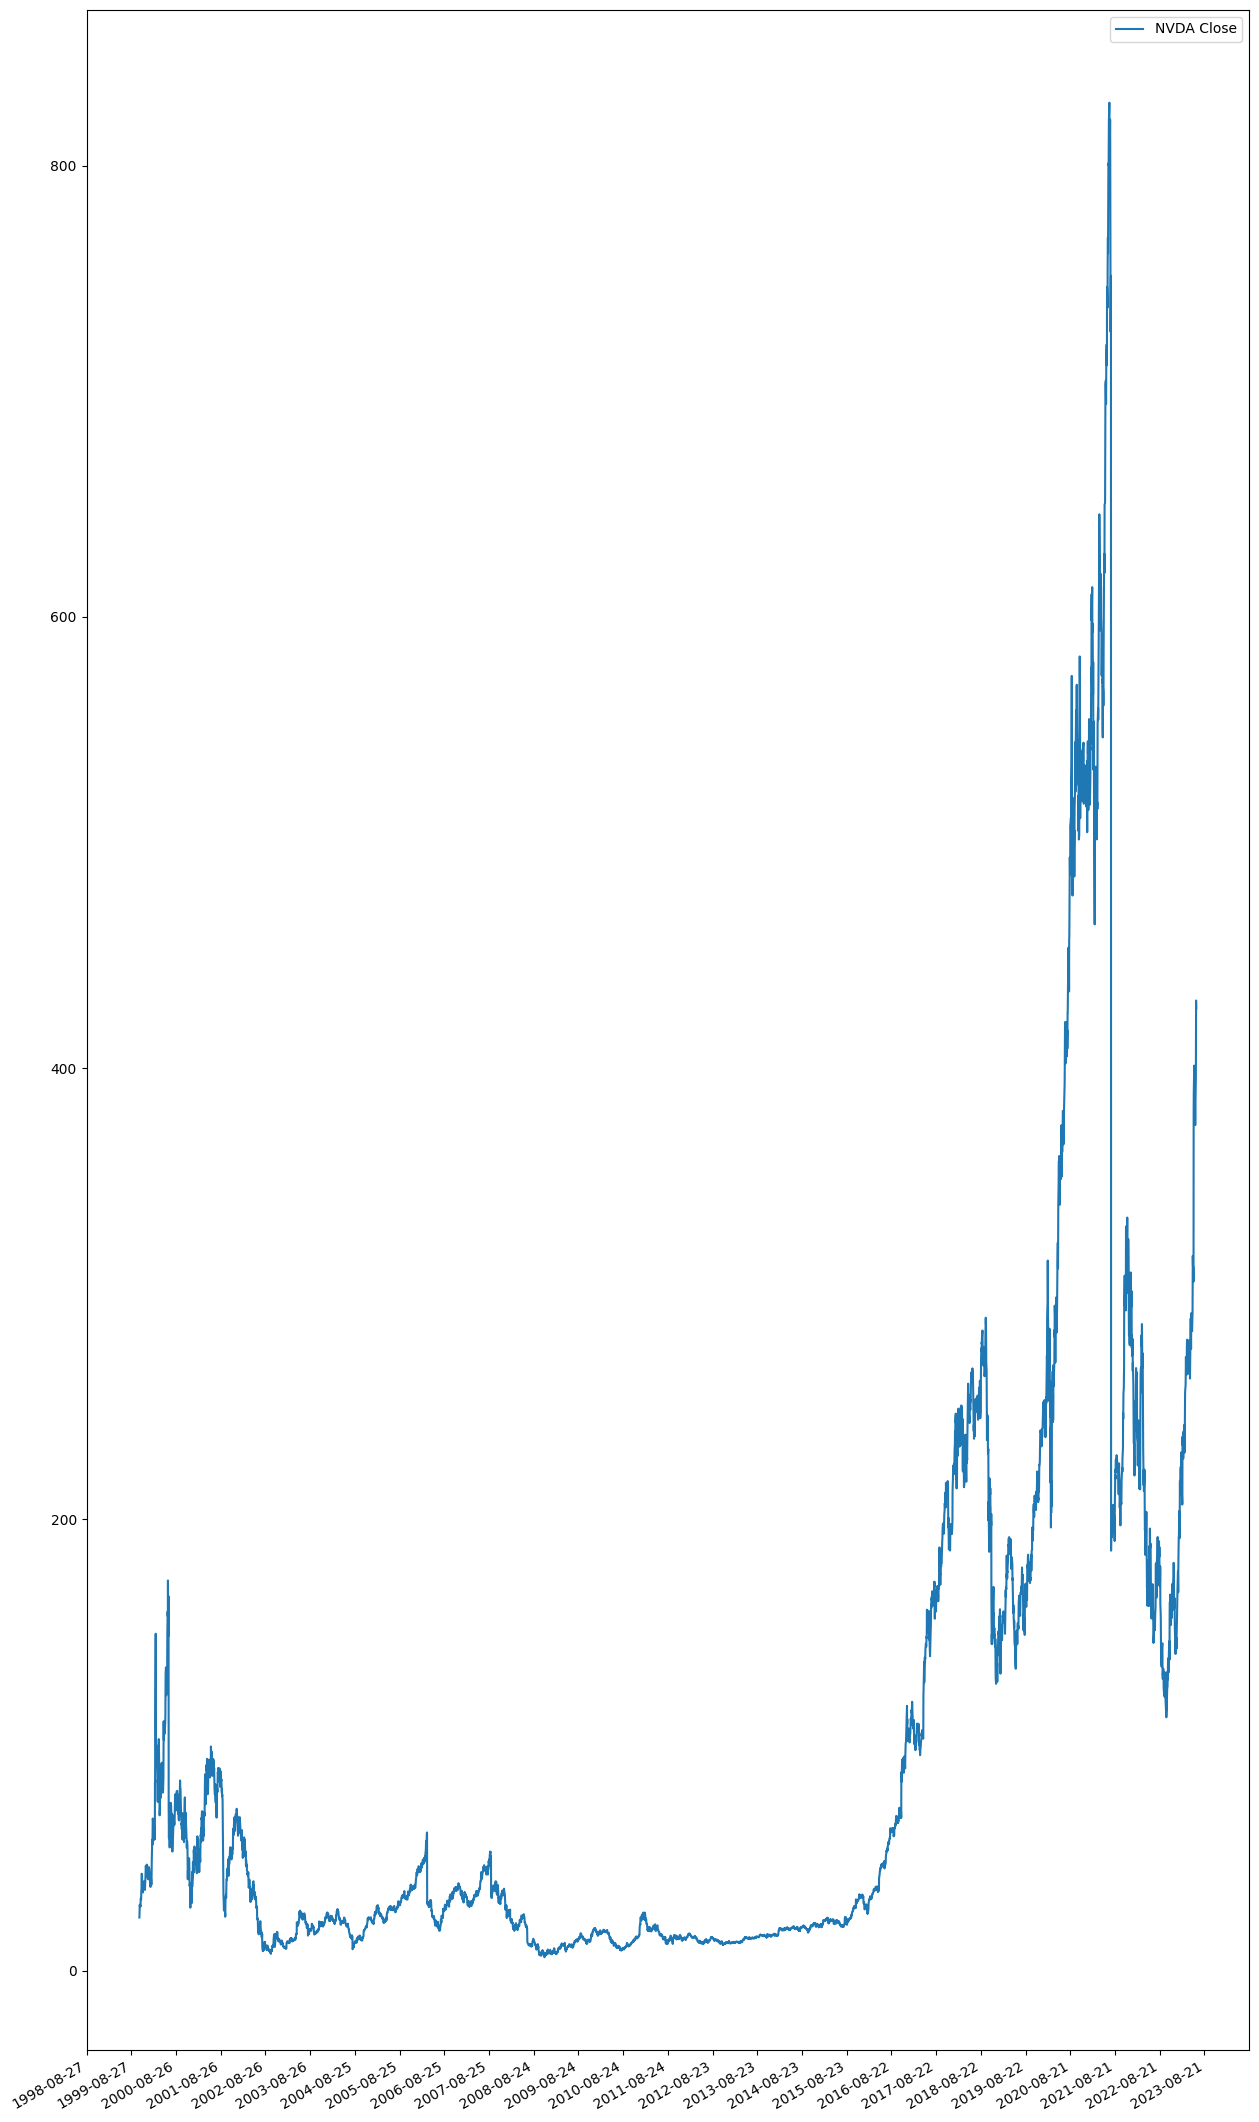

In [ ]:
plt.figure(figsize=(15,30))

#format the x-axis (as we did before)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
x_dates=[dt.datetime.strptime(d,'%Y-%m-%d') for d in nvda_daily_final['date']]

#plot AAPL and MSFT data:
plt.plot(x_dates, nvda_daily_final['close'], label='NVDA Close')

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()